In [1]:
import pandas as pd
df = pd.read_csv('EV Data.csv')

In [3]:
import matplotlib.pyplot as plt

In [3]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value,percentage
0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350,"35000,00%"
1,Austria,Historical,EV stock share,Cars,EV,2010,percent,789.999.961.853,"78999996185300,00%"
2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3,"300,00%"
3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7,"700,00%"
4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62,"6200,00%"


In [5]:
df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2025, 2030, 2035], dtype=int64)

In [7]:
df.reset_index(inplace = True)
df.head()

,index,region,category,parameter,mode,powertrain,year,unit,value,percentage
0,0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350,"35000,00%"
1,1,Austria,Historical,EV stock share,Cars,EV,2010,percent,789.999.961.853,"78999996185300,00%"
2,2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3,"300,00%"
3,3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7,"700,00%"
4,4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62,"6200,00%"


In [9]:
df['region'].unique()

array(['Austria', 'Belgium', 'Brazil', 'Canada', 'China', 'Denmark',
       'EU27', 'Europe', 'France', 'Germany', 'Iceland', 'India',
       'Israel', 'Italy', 'Japan', 'Korea', 'Netherlands', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Rest of the world', 'Spain',
       'Sweden', 'United Kingdom', 'USA', 'World', 'Australia', 'Chile',
       'Finland', 'Mexico', 'Switzerland', 'Turkiye', 'Greece',
       'South Africa', 'Bulgaria', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Estonia', 'Hungary', 'Ireland', 'Latvia',
       'Lithuania', 'Romania', 'Seychelles', 'Slovakia', 'Slovenia',
       'Thailand', 'United Arab Emirates', 'Croatia', 'Cyprus',
       'Luxembourg', 'Indonesia'], dtype=object)

In [11]:
display(df.shape)
display(df.describe())

(12654, 10)

,index,year
count,12654.000000,12654.000000
mean,6326.500000,2019.822112
std,3653.039488,5.476494
min,0.000000,2010.000000
25%,3163.250000,2016.000000
50%,6326.500000,2020.000000
75%,9489.750000,2022.000000
max,12653.000000,2035.000000


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('EV Data.csv')

# Convert 'value' and 'percentage' columns to numeric, handling formatting issues
df['value'] = pd.to_numeric(df['value'].astype(str).str.replace(',', ''), errors='coerce')
df['percentage'] = pd.to_numeric(df['percentage'].astype(str).str.replace('[%,]', '', regex=True), errors='coerce')

# Check for missing values after conversion
missing_values = df.isnull().sum()

# Display cleaned data sample and missing values summary
print(df.head())
print("\nMissing Values Summary:\n", missing_values)



    region    category       parameter   mode powertrain  year      unit  \
0  Austria  Historical        EV stock   Cars        BEV  2010  Vehicles   
1  Austria  Historical  EV stock share   Cars         EV  2010   percent   
2  Belgium  Historical        EV stock  Buses        BEV  2010  Vehicles   
3  Belgium  Historical        EV sales   Vans        BEV  2010  Vehicles   
4  Belgium  Historical        EV stock   Vans        BEV  2010  Vehicles   

   value    percentage  
0  350.0  3.500000e+06  
1    NaN  7.900000e+15  
2    3.0  3.000000e+04  
3    7.0  7.000000e+04  
4   62.0  6.200000e+05  

Missing Values Summary:
 region           0
category         0
parameter        0
mode             0
powertrain       0
year             0
unit             0
value         3165
percentage       0
dtype: int64


In [5]:
df = df.dropna(subset=['value'])


In [11]:
df['value'] = df['value'].interpolate(method='linear')


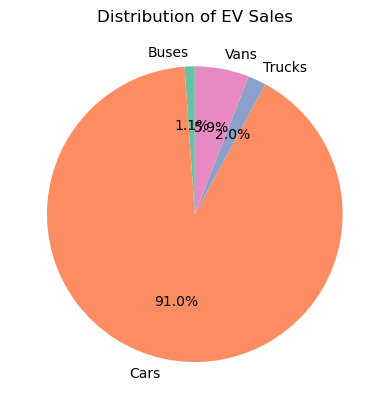

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'value' column is numeric (remove commas, convert to float)
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Filter for 'EV sales' only
modes = df[df['parameter'] == 'EV sales'].groupby('mode')['value'].sum()

# Drop NaN values that might have appeared due to conversion issues
modes = modes.dropna()

# Ensure values are not all zeros (which would also cause pie chart errors)
if modes.sum() > 0:
    fig, ax = plt.subplots()
    ax.pie(modes, labels=modes.index, startangle=90, autopct='%0.1f%%', colors=plt.cm.Set2.colors)
    ax.set_title('Distribution of EV Sales')
    plt.show()
else:
    print("Error: No valid sales data found for plotting.")


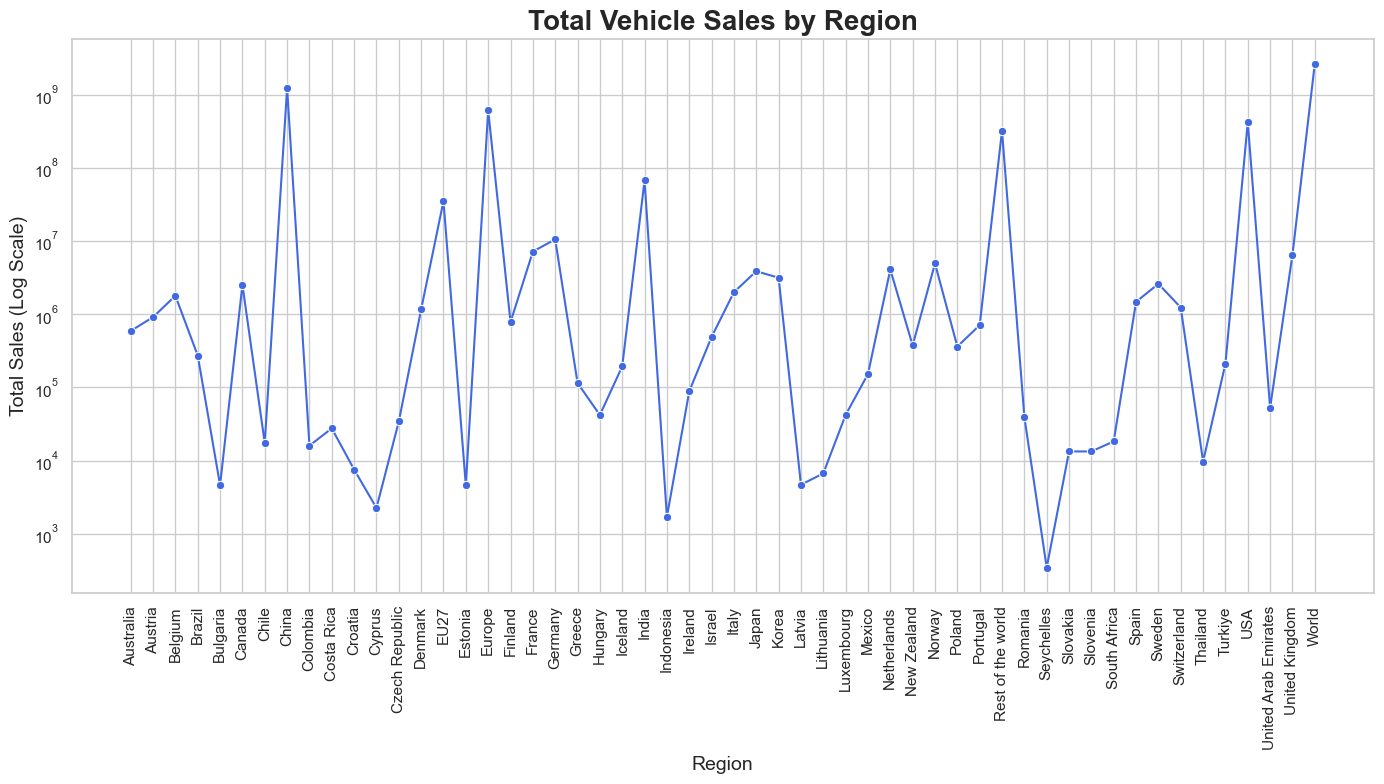

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by region and sum the total sales
vehicles_by_countries = df.groupby('region', as_index=False)['value'].sum()

# Rename the column for clarity
vehicles_by_countries.rename(columns={'value': 'total_value'}, inplace=True)

# Ensure 'total_value' is numeric
vehicles_by_countries['total_value'] = pd.to_numeric(vehicles_by_countries['total_value'], errors='coerce')

# Set Seaborn style
sns.set(style='whitegrid')

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot line chart
sns.lineplot(x=vehicles_by_countries['region'], 
             y=vehicles_by_countries['total_value'], 
             marker='o', 
             color='royalblue', 
             ax=ax)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set title and labels
ax.set_title('Total Vehicle Sales by Region', fontsize=20, fontweight='bold')
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel('Total Sales (Log Scale)', fontsize=14)

# Apply logarithmic scale to y-axis
plt.yscale('log')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\raora\AppData\Local\Temp\ipykernel_29216\1204480709.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='total_value', data=vehicles_by_countries_sorted, palette='viridis', ax=ax)


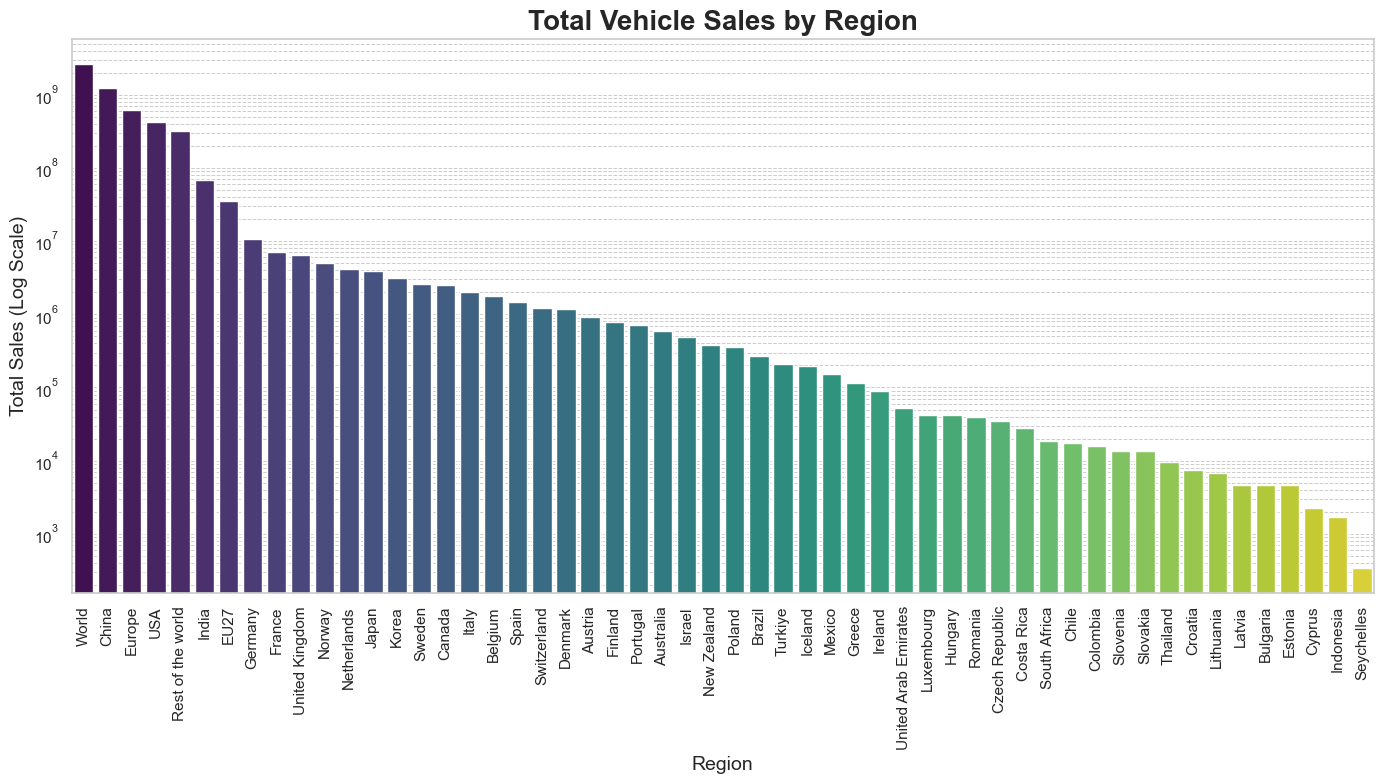

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by region and sum the total sales
vehicles_by_countries = df.groupby('region', as_index=False)['value'].sum()

# Rename the column for clarity
vehicles_by_countries.rename(columns={'value': 'total_value'}, inplace=True)

# Ensure 'total_value' is numeric
vehicles_by_countries['total_value'] = pd.to_numeric(vehicles_by_countries['total_value'], errors='coerce')

# Sort the data by total_value for better visualization
vehicles_by_countries_sorted = vehicles_by_countries.sort_values('total_value', ascending=False)

# Set Seaborn style
sns.set(style='whitegrid')

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bar chart
sns.barplot(x='region', y='total_value', data=vehicles_by_countries_sorted, palette='viridis', ax=ax)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set title and labels
ax.set_title('Total Vehicle Sales by Region', fontsize=20, fontweight='bold')
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel('Total Sales (Log Scale)', fontsize=14)

# Apply logarithmic scale to y-axis
plt.yscale('log')

# Add grid to y-axis for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


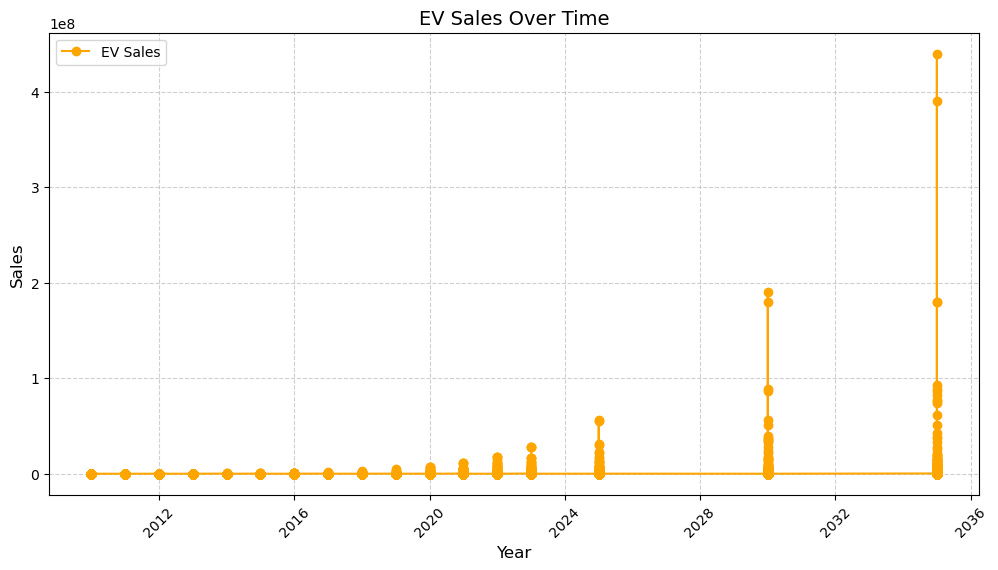

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('EV Data.csv')

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert 'year' to datetime format and sort values
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')
df = df.sort_values(by='year')

# Convert 'value' column to numeric and interpolate missing values
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['value'] = df['value'].interpolate()

# Set 'year' as index
df.set_index('year', inplace=True)

# Plot EV sales over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], marker='o', linestyle='-', color='orange', label='EV Sales')
plt.title('EV Sales Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


In [21]:
pip install ace-tools


C:\Users\raora\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\raora\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\raora\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                12654
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -217081.517
Date:                Thu, 27 Feb 2025   AIC                         434169.034
Time:                        17:48:19   BIC                         434191.371
Sample:                             0   HQIC                        434176.508
                              - 12654                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0098      0.013     -0.755      0.450      -0.035       0.016
ma.L1         -0.9894      0.000  -2189.388      0.000      -0.990      -0.989
sigma2      5.365e+13   3.66e-16   1.47e+29      0.0

C:\Users\raora\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\raora\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\raora\AppData\Local\Temp\ipykernel_18764\774090960.py:40: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='Y')[1:], forecast,


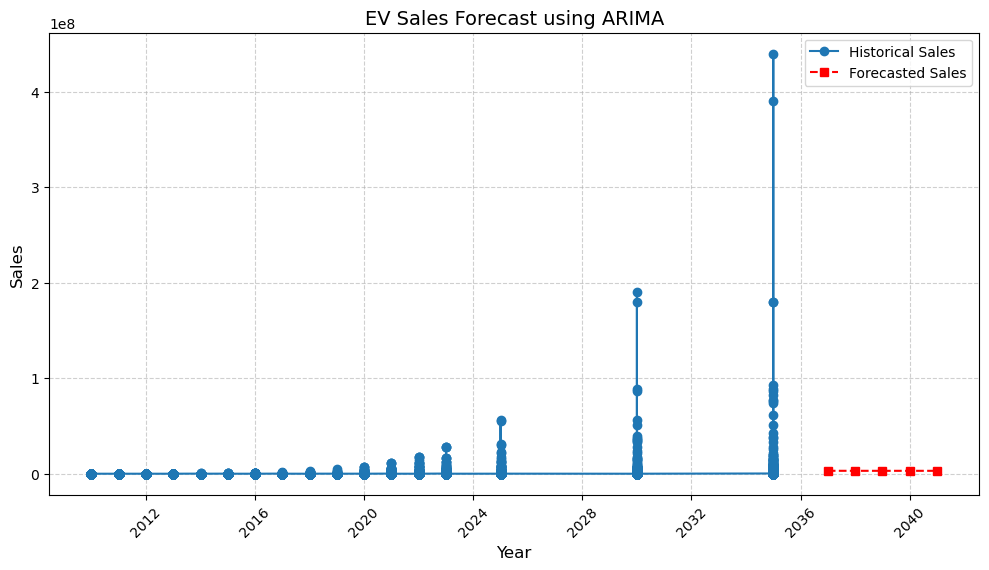

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv('EV Data.csv')

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert 'year' to datetime and sort
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')
df = df.sort_values(by='year')

# Convert 'value' column to numeric and handle missing values
df['value'] = pd.to_numeric(df['value'], errors='coerce').interpolate()

# Set 'year' as index
df.set_index('year', inplace=True)

# Fit ARIMA model
model = ARIMA(df['value'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast next 5 years
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)
forecast_years = [df.index[-1].year + i for i in range(1, forecast_steps + 1)]

# Create forecast DataFrame
forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecasted Sales': forecast})
print(forecast_df)  # Display forecasted values

# Plot historical and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], label='Historical Sales', marker='o', linestyle='-')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='Y')[1:], forecast, 
         label='Forecasted Sales', linestyle='--', marker='s', color='red')
plt.title('EV Sales Forecast using ARIMA', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


In [39]:
from fbprophet import Prophet

# Prepare data for Prophet
df_prophet = df_cleaned.reset_index()[['year', 'value']]
df_prophet.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for values

# Initialize and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Create future dataframe for the next 5 years
future = prophet_model.make_future_dataframe(periods=5, freq='Y')

# Forecast using Prophet
forecast_prophet = prophet_model.predict(future)

# Extract relevant forecasted data
forecast_prophet_cleaned = forecast_prophet[['ds', 'yhat']].tail(5)
forecast_prophet_cleaned.columns = ['Year', 'Forecasted Sales (Prophet)']

# Display forecasted results
import ace_tools as tools
tools.display_dataframe_to_user(name="Prophet Forecast Results", dataframe=forecast_prophet_cleaned)

# Plot Prophet forecast
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned['value'], label='Historical Sales (Cleaned)', marker='o', linestyle='-')
plt.plot(pd.date_range(df_cleaned.index[-1], periods=6, freq='Y')[1:], forecast_cleaned, 
         label='Forecasted Sales (ARIMA)', linestyle='--', marker='s', color='red')
plt.plot(forecast_prophet_cleaned['Year'], forecast_prophet_cleaned['Forecasted Sales (Prophet)'], 
         label='Forecasted Sales (Prophet)', linestyle='--', marker='d', color='green')
plt.title('EV Sales Forecast Comparison: ARIMA vs. Prophet', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'fbprophet'

In [41]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Prepare data for XGBoost
df_xgb = df_cleaned.reset_index()
df_xgb['year'] = df_xgb['year'].dt.year  # Convert datetime to numerical year

# Split data into train and test sets
X = df_xgb[['year']]
y = df_xgb['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Forecast future values
future_years = pd.DataFrame({'year': range(df_xgb['year'].max() + 1, df_xgb['year'].max() + 6)})
forecast_xgb = xgb_model.predict(future_years)

# Create forecast DataFrame
forecast_df_xgb = pd.DataFrame({'Year': future_years['year'], 'Forecasted Sales (XGBoost)': forecast_xgb})

# Display forecasted data
import ace_tools as tools
tools.display_dataframe_to_user(name="XGBoost Forecast Results", dataframe=forecast_df_xgb)

# Plot forecast results
plt.figure(figsize=(12, 6))
plt.plot(df_xgb['year'], df_xgb['value'], label='Historical Sales (Cleaned)', marker='o', linestyle='-')
plt.plot(future_years['year'], forecast_xgb, label='Forecasted Sales (XGBoost)', linestyle='--', marker='s', color='purple')
plt.title('EV Sales Forecast using XGBoost', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Print model evaluation
print(f"Mean Absolute Error (MAE) of XGBoost Model: {mae:.2f}")


ModuleNotFoundError: No module named 'xgboost'

In [43]:
pip install xgboost scikit-learn



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 72.6 kB/s eta 0:28:40
   ---------------------------------------- 0.0/124.9 MB 163.4 kB/s eta 0:12:45
   ---------------------------------------- 0.1/124.9 MB 233.8 kB/s eta 0:08:55
   ---------------------------------------- 0.1/124.9 MB 326.8 kB/s eta 0:06:22
   ---------------------------------------- 0.2/124.9 MB 523.5 kB/s eta 0:03:59
   ---------------------------------------- 0.4/124.9 MB 1.1 MB/s eta 0:01:59
   ---------------------------------------- 0.6/124.9 MB 1.4 MB/s eta 0:01:32
   ---------------------------------------- 0.8/124.9 MB 1.6 MB/s eta 0:01:16
   ---------------------------------------- 1.0/124.9 MB 1.9 MB/s eta 0:01:05
   ---------------------------------------- 1.2/124.9 MB 2.2 MB/s eta 0:00:

In [45]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Prepare data for XGBoost
df_xgb = df_cleaned.reset_index()
df_xgb['year'] = df_xgb['year'].dt.year  # Convert datetime to numerical year

# Split data into train and test sets
X = df_xgb[['year']]
y = df_xgb['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Forecast future values
future_years = pd.DataFrame({'year': range(df_xgb['year'].max() + 1, df_xgb['year'].max() + 6)})
forecast_xgb = xgb_model.predict(future_years)

# Create forecast DataFrame
forecast_df_xgb = pd.DataFrame({'Year': future_years['year'], 'Forecasted Sales (XGBoost)': forecast_xgb})

# Display forecasted data
import ace_tools as tools
tools.display_dataframe_to_user(name="XGBoost Forecast Results", dataframe=forecast_df_xgb)

# Plot forecast results
plt.figure(figsize=(12, 6))
plt.plot(df_xgb['year'], df_xgb['value'], label='Historical Sales (Cleaned)', marker='o', linestyle='-')
plt.plot(future_years['year'], forecast_xgb, label='Forecasted Sales (XGBoost)', linestyle='--', marker='s', color='purple')
plt.title('EV Sales Forecast using XGBoost', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Print model evaluation
print(f"Mean Absolute Error (MAE) of XGBoost Model: {mae:.2f}")

NameError: name 'df_cleaned' is not defined

   Year  Forecasted Sales (XGBoost)
0  2036                 222032.0625
1  2037                 222032.0625
2  2038                 222032.0625
3  2039                 222032.0625
4  2040                 222032.0625


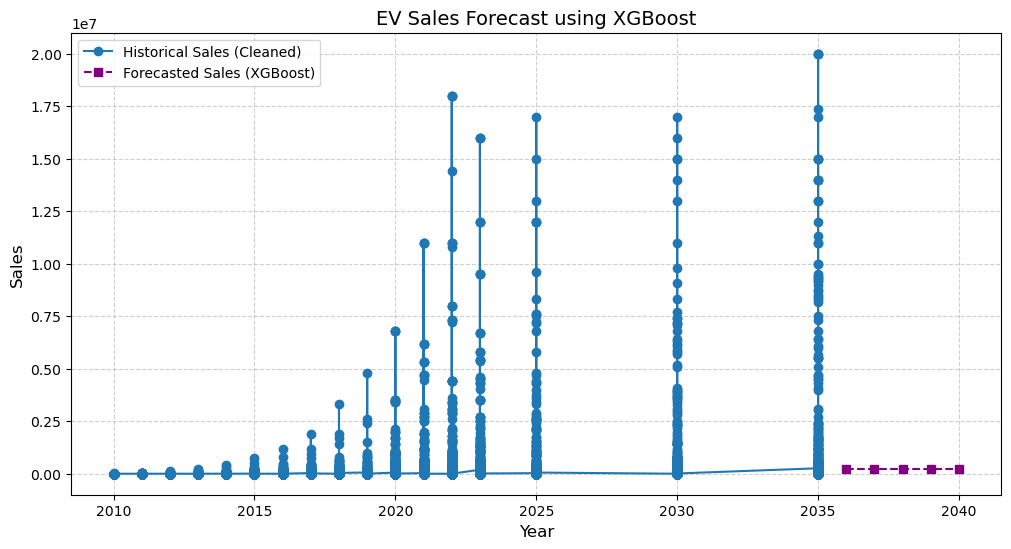

Mean Absolute Error (MAE) of XGBoost Model: 701700.62


In [47]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('EV Data.csv')

# Preprocess the data
df.columns = df.columns.str.strip()
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')
df = df.sort_values(by='year')
df['value'] = pd.to_numeric(df['value'], errors='coerce').interpolate()
df.set_index('year', inplace=True)

# **Remove Outliers using Z-score method**
from scipy.stats import zscore
df_cleaned = df[(np.abs(zscore(df['value'])) < 3)]

# Convert year back to numerical for XGBoost
df_xgb = df_cleaned.reset_index()
df_xgb['year'] = df_xgb['year'].dt.year  # Convert datetime to numerical year

# Split data into train and test sets
X = df_xgb[['year']]
y = df_xgb['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Forecast future values
future_years = pd.DataFrame({'year': range(df_xgb['year'].max() + 1, df_xgb['year'].max() + 6)})
forecast_xgb = xgb_model.predict(future_years)

# Create forecast DataFrame
forecast_df_xgb = pd.DataFrame({'Year': future_years['year'], 'Forecasted Sales (XGBoost)': forecast_xgb})
print(forecast_df_xgb)

# Plot forecast results
plt.figure(figsize=(12, 6))
plt.plot(df_xgb['year'], df_xgb['value'], label='Historical Sales (Cleaned)', marker='o', linestyle='-')
plt.plot(future_years['year'], forecast_xgb, label='Forecasted Sales (XGBoost)', linestyle='--', marker='s', color='purple')
plt.title('EV Sales Forecast using XGBoost', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Print model evaluation
print(f"Mean Absolute Error (MAE) of XGBoost Model: {mae:.2f}")
